# Notebook Outlining the Usage of KNN for LoS/NLoS classification

This Notebook provides a brief introduction to usage of KNN base LoS/NLoS classification. We employ the UWB Localisation Dataset openly available at: http://log-a-tec.eu/uwb-ds.html
You should download and extract the dataset in a subfolder name data
You also need to remove first version line from all csv files

We utilise two parameters, i.e. RSS of First Path and Channel Impulse response amplitude of first path.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
from IPython.display import display, HTML


path = r'data/office/measurements/1.07_9.37_1.2/'                     # use your path
all_files = glob.glob(path+"*.csv")     # advisable to use os.path.join as this makes concatenation OS independent
fields =['NLOS','FP_POINT1','RSS_FP']
df_from_each_file = (pd.read_csv(f,skipinitialspace=True, usecols=fields) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)
display(df)

,NLOS,RSS_FP,FP_POINT1
0,LOS,-78.194451,-80.535661
1,LOS,-78.338668,-80.627503
2,LOS,-78.216480,-81.031538
3,LOS,-78.240909,-81.179942
4,LOS,-78.345567,-81.243439
...,...,...,...
1483,NLOS,-82.590764,-86.272480
1484,NLOS,-81.783098,-85.618811
1485,NLOS,-81.978536,-86.146448
1486,NLOS,-82.571613,-86.140362


Filter the LoS/NLoS data for visualisation

In [66]:
NLoSFilter = df[df['NLOS'] == 'NLOS'];
LoSFilter = df[df['NLOS'] == 'LOS'];
NLoSFilter.head()

,NLOS,RSS_FP,FP_POINT1
31,NLOS,-79.317305,-84.496205
32,NLOS,-79.392652,-85.282834
33,NLOS,-79.266979,-84.491246
34,NLOS,-79.533815,-84.698210
35,NLOS,-79.811188,-85.720904


In [67]:
LoSFilter.head()

,NLOS,RSS_FP,FP_POINT1
0,LOS,-78.194451,-80.535661
1,LOS,-78.338668,-80.627503
2,LOS,-78.216480,-81.031538
3,LOS,-78.240909,-81.179942
4,LOS,-78.345567,-81.243439


Visualisation of LoS/NLoS clusters

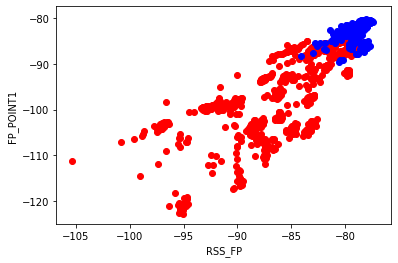

In [69]:
plt.scatter(NLoSFilter['RSS_FP'],NLoSFilter['FP_POINT1'],c='red')
plt.scatter(LoSFilter['RSS_FP'],LoSFilter['FP_POINT1'],c='blue')
plt.xlabel('RSS_FP')
plt.ylabel('FP_POINT1')
plt.show()

In [81]:
clabel = df['NLOS']
X = df[['RSS_FP','FP_POINT1']]
X

,RSS_FP,FP_POINT1
0,-78.194451,-80.535661
1,-78.338668,-80.627503
2,-78.216480,-81.031538
3,-78.240909,-81.179942
4,-78.345567,-81.243439
...,...,...
1483,-82.590764,-86.272480
1484,-81.783098,-85.618811
1485,-81.978536,-86.146448
1486,-82.571613,-86.140362


Code for Knn similar to Scikit learn blog and stack abuse:https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,clabel, test_size=0.20)

In [83]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

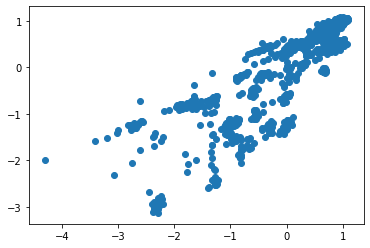

In [96]:
plt.scatter(X_train[:,0],X_train[:,1])

In [101]:
y_pred = classifier.predict(X_test)
display(y_test==y_pred)

1209     True
987      True
1048    False
211      True
1182     True
        ...  
349      True
1478     True
132      True
22       True
728      True
Name: NLOS, Length: 298, dtype: bool

In [102]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 55  16]
 [ 20 207]]
              precision    recall  f1-score   support

         LOS       0.73      0.77      0.75        71
        NLOS       0.93      0.91      0.92       227

    accuracy                           0.88       298
   macro avg       0.83      0.84      0.84       298
weighted avg       0.88      0.88      0.88       298

